In [1]:
#Import Required Libraries
import pandas as pd
import random
from collections import Counter

# Load dataset
df = pd.read_csv('tmdb_movies_cleanedd.csv')

# Drop rows with missing overviews or genres
df = df.dropna(subset=['Overview', 'Genres'])

# Convert genre string to list if necessary
df['Genres'] = df['Genres'].apply(lambda x: x.split(',') if isinstance(x, str) else x)

# Assign one random genre per movie
df['Genres'] = df['Genres'].apply(lambda x: random.choice(x) if isinstance(x, list) else x)

# Get top 2 most common genres
top_genres = df['Genres'].value_counts().nlargest(2).index.tolist()

# Filter dataset to only include those top genres
df = df[df['Genres'].isin(top_genres)]

# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Print genre distribution
print("📊 Top 2 genres and their counts after filtering:")
print(df['Genres'].value_counts())

# Save the cleaned dataset
df.to_csv('tmdb_movies_data.csv', index=False)
print(f"\n✅ Final dataset saved as 'tmdb_movies_data.csv' with {len(df)} samples.")

📊 Top 2 genres and their counts after filtering:
Genres
Drama     17188
Comedy     8350
Name: count, dtype: int64

✅ Final dataset saved as 'tmdb_movies_data.csv' with 25538 samples.


In [3]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [4]:
# Loading the CSV file with try-except block
try:
    my_dataset = pd.read_csv('tmdb_movies_data.csv', encoding='utf-8')
    print("✅ File loaded successfully!")
except FileNotFoundError:
    print("❌ Error: File not found. Please check the file name and path.")

✅ File loaded successfully!


In [7]:
# Dropping null values
my_dataset = my_dataset.dropna()

In [9]:
# Importing NLTK and downloading stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Daniyal
[nltk_data]     Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Storing stop words in a variable
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [13]:
# Removing stopwords from 'Overview'
my_dataset['Overview'] = my_dataset['Overview'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [14]:
# Removing special characters and numbers, keeping only letters and spaces
pattern = r'[^a-zA-Z\s]'
my_dataset['Overview'] = my_dataset['Overview'].apply(lambda x: re.sub(pattern, '', x))

In [17]:
# Getting unique genres
categories = my_dataset['Genres'].unique()
for category in categories:
    print(category)

Comedy
Drama


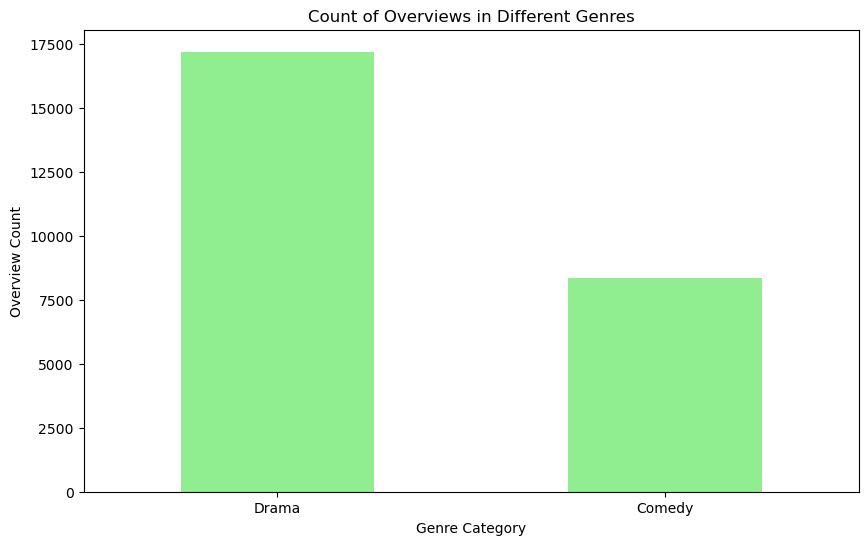

In [19]:
# Plotting the Bar Graph for Genre Distribution
category_counts = my_dataset['Genres'].value_counts()
plt.figure(figsize=(10,6))
category_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Genre Category')
plt.ylabel('Overview Count')
plt.title('Count of Overviews in Different Genres')
plt.xticks(rotation=0)
plt.show()

In [21]:
##MACHINE LEARNING PROCESS STARTS FROM HERE

In [23]:
# Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [25]:
# Prepare your data
X = my_dataset['Overview']
y = my_dataset['Genres']

In [27]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [30]:
# Training the dataset with Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [33]:
# Making predictions on test set
y_pred = model.predict(X_test_tfidf)

In [35]:
# Printing Accuracy and classification report
print(f"\n✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.7731

📊 Classification Report:

              precision    recall  f1-score   support

      Comedy       0.75      0.46      0.57      1673
       Drama       0.78      0.93      0.85      3435

    accuracy                           0.77      5108
   macro avg       0.76      0.69      0.71      5108
weighted avg       0.77      0.77      0.76      5108

